In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
spotlight_df = pd.read_csv('./scores/scores_spotlight_oke1.csv')
fox_df = pd.read_csv('./scores/scores_fox_oke1.csv')
tagme_df = pd.read_csv('./scores/scores_tagme_oke1.csv')

all_none_df = pd.read_csv('./scores/scores_all_none_oke1.csv')
all_rsingle_df = pd.read_csv('./scores/scores_all_r_singles_oke1.csv')

In [4]:
spotlight2_df = pd.read_csv('./scores/scores_spotlight_oke2.csv')
fox2_df = pd.read_csv('./scores/scores_fox_oke2.csv')
tagme2_df = pd.read_csv('./scores/scores_tagme_oke2.csv')

all_none2_df = pd.read_csv('./scores/scores_all_none_oke2.csv')
all_rsingle2_df = pd.read_csv('./scores/scores_all_r_singles_oke2.csv')

In [5]:
def get_metrics(dfs):
    d = []
    for name, df in dfs:
        micro_precision = df.tp.sum() / (df.tp.sum() + df.fp.sum())
        micro_recall = df.tp.sum() / (df.tp.sum() + df.fn.sum())
        micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall)
        d.append({
            'name': name, 
            'macro_precision': df.macro_precision.mean(), 
            'macro_recall': df.recall.mean(),
            'macro_f1': df.f1.mean(),
            
            'micro_precision': micro_precision, 
            'micro_recall': micro_recall,
            'micro_f1': micro_f1,
        })
    return pd.DataFrame(d)

In [6]:

metrics1 = get_metrics([
    ('spotlight', spotlight_df),
    ('fox', fox_df),
    ('tagme', tagme_df),
    ('all_none', all_none_df),
    ('all_rsingle', all_rsingle_df)
])

metrics2 = get_metrics([
    ('spotlight', spotlight2_df),
    ('fox', fox2_df),
    ('tagme', tagme2_df),
    ('all_none', all_none2_df),
    ('all_rsingle', all_rsingle2_df)
])

metrics1['source'] = 'tarefa 1'
metrics2['source'] = 'tarefa 2'

metrics_all = metrics1.append(metrics2).reset_index()[['source', 
                                                       'name', 
                                                       'macro_precision', 'macro_recall', 'macro_f1',
                                                       'micro_precision', 'micro_recall', 'micro_f1',]]
metrics_all

,source,name,macro_precision,macro_recall,macro_f1,micro_precision,micro_recall,micro_f1
0,tarefa 1,spotlight,0.375183,0.559700,0.436195,0.386266,0.604027,0.471204
1,tarefa 1,fox,0.535532,0.722321,0.577936,0.505747,0.712551,0.591597
2,tarefa 1,tagme,0.497108,0.423898,0.425966,0.478417,0.393491,0.431818
3,tarefa 1,all_none,0.352618,0.822606,0.472471,0.342105,0.885106,0.493476
4,tarefa 1,all_rsingle,0.550383,0.606975,0.557696,0.556886,0.601942,0.578538
5,tarefa 2,spotlight,0.410923,0.472459,0.417669,0.409953,0.529052,0.461949
6,tarefa 2,fox,0.513205,0.529287,0.481071,0.503145,0.528053,0.515298
7,tarefa 2,tagme,0.545058,0.340656,0.396147,0.549180,0.349869,0.427432
8,tarefa 2,all_none,0.390983,0.707172,0.471816,0.372727,0.762082,0.500611
9,tarefa 2,all_rsingle,0.550548,0.466225,0.478729,0.569024,0.476056,0.518405


## Precisão

### Macro

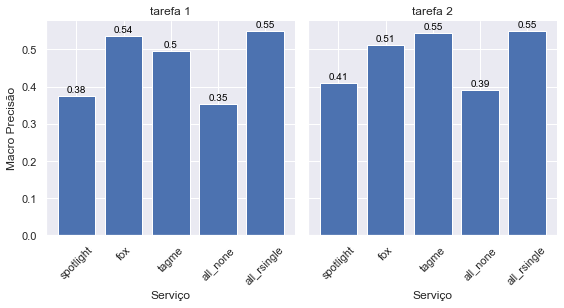

In [16]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.bar, "name", "macro_precision")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Macro Precisão')

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].macro_precision):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

### Micro

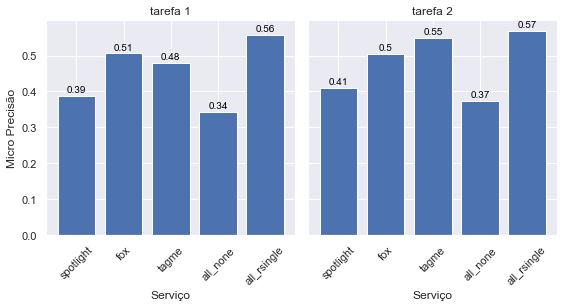

In [8]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.bar, "name", "micro_precision")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Micro Precisão')

for t_, task in enumerate(metrics_all.source.unique()):
#     g.axes[0, t_].title(lambda x: 'Dynamic lot-size problem chart')
    for i, v in enumerate(metrics_all[metrics_all.source == task].micro_precision):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

## Recall

### Macro

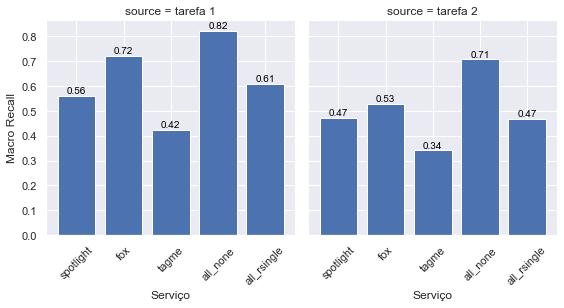

In [9]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.set_titles("{col_name}")
g.map(plt.bar, "name", "macro_recall");
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Macro Recall')

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].macro_recall):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

### Micro

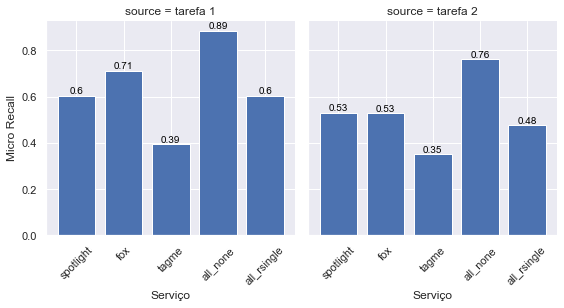

In [10]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.bar, "name", "micro_recall");
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Micro Recall')

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].micro_recall):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

## F1

### Macro

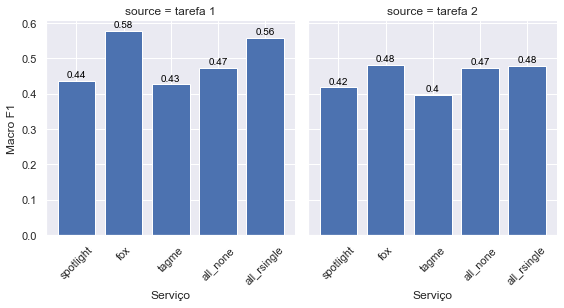

In [11]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.bar, "name", "macro_f1");
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Macro F1')

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].macro_f1):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

### Micro

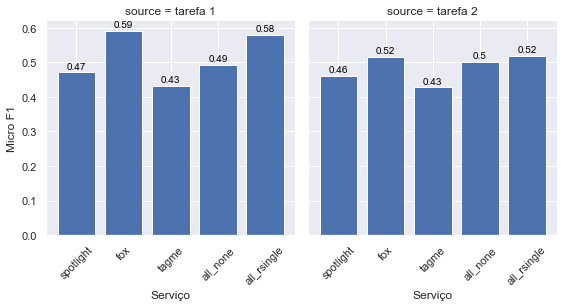

In [12]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.bar, "name", "micro_f1");
g.set_xticklabels(rotation=45)
g.set_axis_labels('Serviço', 'Micro F1')

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].micro_f1):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

## Precisão X Recall

### Macro

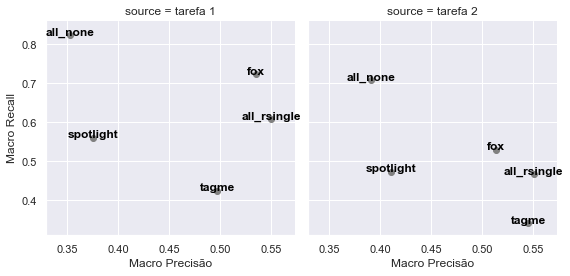

In [13]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.scatter, "macro_precision", "macro_recall", color='gray')

g.set_axis_labels('Macro Precisão', 'Macro Recall')

for i, df in enumerate([metrics1, metrics2]):
    for line in range(0, df.shape[0]):
         g.axes[0, i].text(df.macro_precision[line], df.macro_recall[line], df.name[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

### Micro

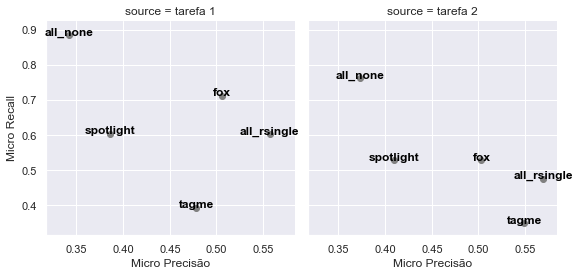

In [14]:
g = sns.FacetGrid(metrics_all, col="source", height=4)
g.map(plt.scatter, "micro_precision", "micro_recall", color='gray')

g.set_axis_labels('Micro Precisão', 'Micro Recall')

for i, df in enumerate([metrics1, metrics2]):
    for line in range(0, df.shape[0]):
         g.axes[0, i].text(df.micro_precision[line], df.micro_recall[line], df.name[line], horizontalalignment='center', size='medium', color='black', weight='semibold')